# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from scipy.io import loadmat
from tabulate import tabulate
import matplotlib.pyplot as plt

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Dataset

In [2]:
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

In [3]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

# Exploratory Data Analysis

In [4]:
# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Assigning Variables</h2>
    
</div>


In [5]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

### Calculate the duration of each sample in seconds

EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels. "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

In [6]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz

num_samples, num_channels, num_time_points = eeg_samples.shape
sample_duration = num_time_points / sampling_rate

### Check for missing values

In [7]:
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


In [8]:
print("Number of subjects:", len(np.unique(subindex)))
print("EEGsample shape:", eeg_samples.shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(substates, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts)

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


#### The initial exploration of the EEG dataset reveals the following details:

#### EEG Samples (EEGsample):

  * The dataset contains 2022 EEG samples.
  * Each EEG sample is from 30 channels.
  * Each channel has 384 data points, corresponding to a 3-second EEG recording at a sampling rate of 128Hz.

#### Subject States (substate):

  * There are two unique states: 0 representing the alert state and 1 representing the drowsy state.
  * Each state has 1011 samples, indicating a balanced dataset with respect to the two states.

#### Subject Indexes (subindex):

  * There are 11 unique subjects in the dataset (labeled 1 to 11).
  * The distribution of samples across subjects varies, ranging from a minimum of 102 samples to a maximum of 314 samples per subject.

## State-specific Analysis: 'Alert' and 'Drowsy'

In [9]:
substates_flat = substates.flatten()

In [10]:
# Calculating means and standard deviations for each channel in both states

#Alert States
mean_alert = np.mean(eeg_samples[substates_flat == 0], axis=(0, 2))
std_alert = np.std(eeg_samples[substates_flat == 0], axis=(0, 2))

#Drowsy States
mean_drowsy = np.mean(eeg_samples[substates_flat == 1], axis=(0, 2))
std_drowsy = np.std(eeg_samples[substates_flat == 1], axis=(0, 2))

In [11]:
# Creating a DataFrame for easy viewing
stats_df = pd.DataFrame({
    'Channel': range(1, 31),
    'Mean_Alert': mean_alert,
    'Std_Alert': std_alert,
    'Mean_Drowsy': mean_drowsy,
    'Std_Drowsy': std_drowsy
})

In [12]:
stats_df  

,Channel,Mean_Alert,Std_Alert,Mean_Drowsy,Std_Drowsy
0,1,0.120450,17.630071,-0.163686,10.802148
1,2,0.082160,17.209800,-0.163763,12.170468
2,3,0.052289,9.635932,-0.061430,9.706984
3,4,0.002035,30.798487,-0.113082,11.617223
4,5,0.022715,9.642534,-0.159155,11.707889
5,6,0.021788,26.476227,-0.154311,17.197473
6,7,0.019232,12.678096,-0.126242,9.635353
7,8,0.046900,8.752803,-0.070030,9.094665
8,9,0.023307,9.758593,-0.130595,11.230886
9,10,0.017935,9.891951,-0.138523,12.140691


## EEG Channel Statistics Across Subjects and Timepoints

In [13]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Create a list of dictionaries for each channel's statistics
channel_stats = [
    {
        "Channel": channel_index + 1,
        "Mean": f"{mean_values[channel_index]:.4f}",
        "Std Dev": f"{std_values[channel_index]:.4f}",
        "Min": f"{min_values[channel_index]:.4f}",
        "Max": f"{max_values[channel_index]:.4f}"
    }
    for channel_index in range(num_channels)
]

In [14]:
# Printing the table
print("Basic Statistics for EEG Channels")
print(tabulate(channel_stats, headers="keys", tablefmt="grid"))

Basic Statistics for EEG Channels
+-----------+---------+-----------+-----------+----------+
|   Channel |    Mean |   Std Dev |       Min |      Max |
+===========+=========+===========+===========+==========+
|         1 | -0.0216 |   14.621  |  -573.236 |  871.908 |
+-----------+---------+-----------+-----------+----------+
|         2 | -0.0408 |   14.9052 | -1299.32  |  911.153 |
+-----------+---------+-----------+-----------+----------+
|         3 | -0.0046 |    9.6717 |  -208.161 |  243.286 |
+-----------+---------+-----------+-----------+----------+
|         4 | -0.0555 |   23.2757 | -1302.31  | 1795.54  |
+-----------+---------+-----------+-----------+----------+
|         5 | -0.0682 |   10.7254 |  -259.186 |  157.868 |
+-----------+---------+-----------+-----------+----------+
|         6 | -0.0663 |   22.3244 | -1914.6   | 1294.24  |
+-----------+---------+-----------+-----------+----------+
|         7 | -0.0535 |   11.2602 |  -496.507 |  754.21  |
+-----------+---------

# Data Visualization

## Distribution of Subindex and Substate Values

In [15]:
# Get unique values and their counts for subindex and substate
unique_subindex, counts_subindex = np.unique(mat_data['subindex'], return_counts=True)
unique_substate, counts_substate = np.unique(mat_data['substate'], return_counts=True)

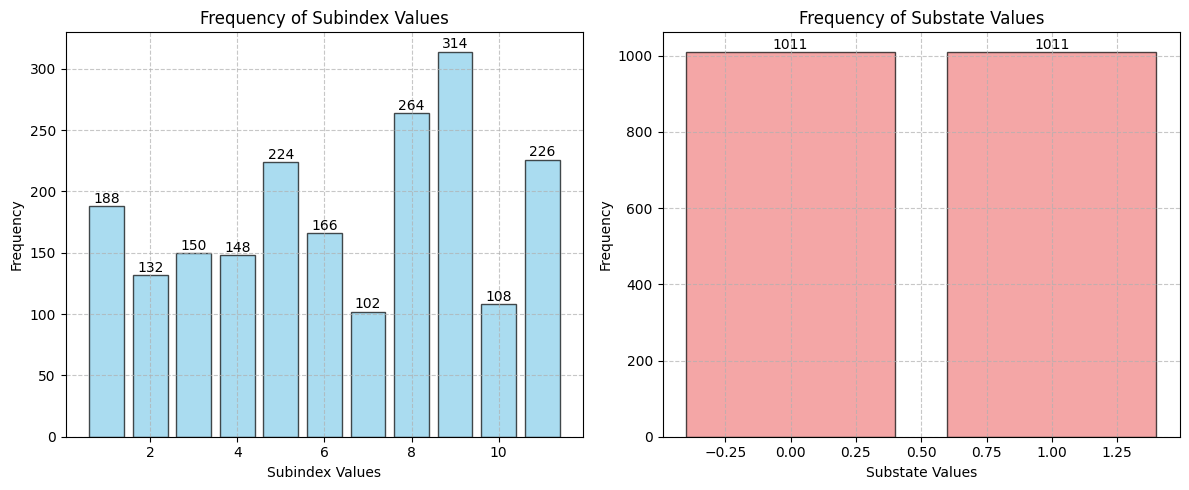

In [16]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for subindex
axes[0].bar(unique_subindex, counts_subindex, align='center', alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Frequency of Subindex Values')
axes[0].set_xlabel('Subindex Values')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Add count annotations on top of the bars for subindex
for x, y in zip(unique_subindex, counts_subindex):
    axes[0].text(x, y + 0.1, str(y), ha='center', va='bottom')


    

# Plot histogram for substate
axes[1].bar(unique_substate, counts_substate, align='center', alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('Frequency of Substate Values')
axes[1].set_xlabel('Substate Values')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Add count annotations on top of the bars for substate
for x, y in zip(unique_substate, counts_substate):
    axes[1].text(x, y + 0.1, str(y), ha='center', va='bottom')




# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Analysis of Substate Distribution Across Subindices

In [17]:
# Group by subindex and count occurrences of 0 and 1 in substate
subindex_values, substate_counts = np.unique(mat_data['subindex'], return_counts=True)
substate_0_counts = []
substate_1_counts = []

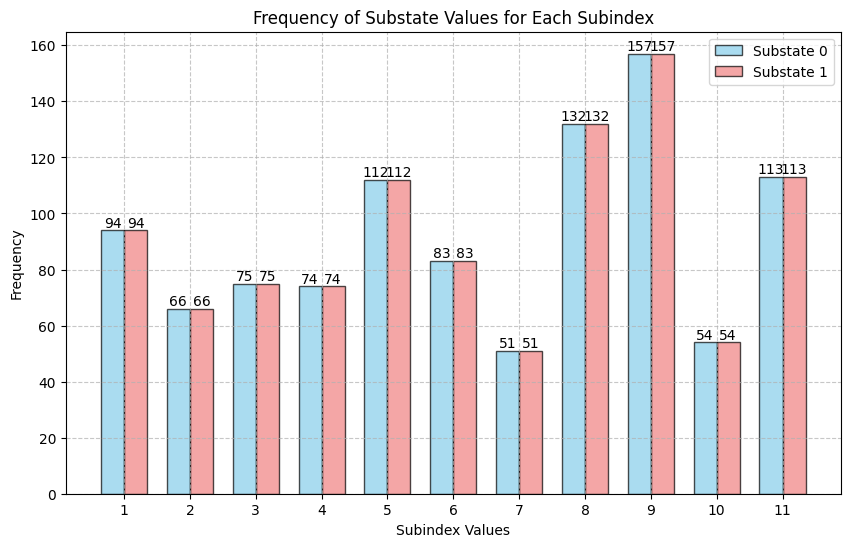

In [18]:
for subindex_value in subindex_values:
    substate_values_for_subindex = mat_data['substate'][mat_data['subindex'] == subindex_value]
    substate_0_counts.append(np.sum(substate_values_for_subindex == 0))
    substate_1_counts.append(np.sum(substate_values_for_subindex == 1))

# Set up the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions_0 = np.arange(len(subindex_values))
bar_positions_1 = bar_positions_0 + bar_width

ax.bar(bar_positions_0, substate_0_counts, width=bar_width, label='Substate 0', alpha=0.7, color='skyblue', edgecolor='black')
ax.bar(bar_positions_1, substate_1_counts, width=bar_width, label='Substate 1', alpha=0.7, color='lightcoral', edgecolor='black')

# Add count annotations on top of each bar
for x, y in zip(bar_positions_0, substate_0_counts):
    ax.text(x, y + 0.1, str(y), ha='center', va='bottom')

for x, y in zip(bar_positions_1, substate_1_counts):
    ax.text(x, y + 0.1, str(y), ha='center', va='bottom')

ax.set_xticks(bar_positions_0 + bar_width / 2)
ax.set_xticklabels(subindex_values)
ax.set_xlabel('Subindex Values')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Substate Values for Each Subindex')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

# Dimensionality Reduction

# EEG Signal Averaging-Based Channel Reduction

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Assigning Variables</h2>
    
</div>


In [19]:
from sklearn.decomposition import FastICA

In [20]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

# Data Manipulation and applying Average

# Segregating Alert State Data

In [21]:
# Segregating EEG samples where substate values are 0
substate_zero_indices = np.where(substates == 0)[0]
alert_state_data = eeg_samples[substate_zero_indices]

alert_state_data.shape

(1011, 30, 384)

In [22]:
processed_samples_ica = []
n_components = 1

for sample in alert_state_data:
    
    # Transpose the sample
    transposed = sample.T

    # Apply Independent Component Analysis (ICA)
    ica = FastICA(n_components= n_components)
    ica_result = ica.fit_transform(transposed)

    # Flatten the ICA result and add to the list
    processed_samples_ica.append(ica_result.flatten())

# Convert the list to a Pandas DataFrame
alert_state = pd.DataFrame(processed_samples_ica)

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

In [23]:
alert_state

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.079646,0.067010,0.005347,0.058320,0.074010,0.042213,0.072771,0.027922,-0.030165,-0.027784,...,0.020579,0.030530,-0.025948,-0.018498,-0.015178,0.001323,0.034058,-0.042742,-0.074124,-0.001799
1,0.004925,-0.036681,-0.010030,-0.019597,-0.032312,-0.101428,-0.145372,-0.097785,-0.107758,-0.103269,...,-0.033925,0.007269,-0.057599,-0.124002,-0.030644,-0.028839,-0.048661,0.018835,-0.015240,-0.044446
2,-0.106728,-0.076625,-0.033612,-0.013235,-0.030265,-0.021139,0.049537,0.068247,0.041546,0.051575,...,-0.000886,-0.000767,0.016716,0.000423,-0.002897,0.035800,0.021440,-0.024091,-0.021431,-0.014402
3,0.001885,0.008067,-0.030115,0.000021,0.003500,0.001421,0.057627,0.055256,0.008956,0.066813,...,-0.177552,-0.086650,-0.052089,-0.027776,0.023195,-0.006267,0.010749,0.117735,0.135514,0.084495
4,-0.037192,-0.012988,0.020673,-0.030748,-0.043061,-0.006858,0.014165,-0.022142,-0.052361,0.011662,...,0.077256,0.043764,0.068143,0.088627,0.118083,0.101450,-0.041492,0.014451,0.118200,0.026499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.008060,-0.026643,-0.020992,-0.014593,-0.018360,-0.021638,-0.036173,-0.034750,-0.025906,-0.017288,...,-0.032807,-0.026741,-0.010566,0.015802,0.019734,0.014316,0.018529,0.017343,0.011830,0.010570
1007,0.032166,0.010139,0.010159,0.010550,-0.001769,-0.011603,-0.032825,-0.026867,0.006042,0.020306,...,-0.011234,0.000934,0.050085,0.081509,0.073992,0.043016,0.000058,-0.012076,-0.009199,-0.012437
1008,-0.024215,-0.044846,-0.045445,-0.048269,-0.059297,-0.036886,-0.011878,-0.000176,0.015987,0.026933,...,-0.042172,-0.055632,-0.074702,-0.083216,-0.058731,-0.073202,-0.108512,-0.095718,-0.047973,0.017575
1009,-0.038365,-0.031894,-0.049083,-0.077958,-0.084042,-0.094668,-0.084474,-0.067533,-0.070297,-0.032207,...,0.008141,0.012512,-0.011702,0.001879,0.018329,0.012826,0.007462,0.000770,0.020077,0.043821


In [24]:
data0 = {'substate': [0] * 1011}
substate_alert = pd.DataFrame(data0)

substate_alert

,substate
0,0
1,0
2,0
3,0
4,0
...,...
1006,0
1007,0
1008,0
1009,0


In [25]:
result0 = pd.concat([alert_state, substate_alert], axis=1)

In [26]:
result0

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,substate
0,0.079646,0.067010,0.005347,0.058320,0.074010,0.042213,0.072771,0.027922,-0.030165,-0.027784,...,0.030530,-0.025948,-0.018498,-0.015178,0.001323,0.034058,-0.042742,-0.074124,-0.001799,0
1,0.004925,-0.036681,-0.010030,-0.019597,-0.032312,-0.101428,-0.145372,-0.097785,-0.107758,-0.103269,...,0.007269,-0.057599,-0.124002,-0.030644,-0.028839,-0.048661,0.018835,-0.015240,-0.044446,0
2,-0.106728,-0.076625,-0.033612,-0.013235,-0.030265,-0.021139,0.049537,0.068247,0.041546,0.051575,...,-0.000767,0.016716,0.000423,-0.002897,0.035800,0.021440,-0.024091,-0.021431,-0.014402,0
3,0.001885,0.008067,-0.030115,0.000021,0.003500,0.001421,0.057627,0.055256,0.008956,0.066813,...,-0.086650,-0.052089,-0.027776,0.023195,-0.006267,0.010749,0.117735,0.135514,0.084495,0
4,-0.037192,-0.012988,0.020673,-0.030748,-0.043061,-0.006858,0.014165,-0.022142,-0.052361,0.011662,...,0.043764,0.068143,0.088627,0.118083,0.101450,-0.041492,0.014451,0.118200,0.026499,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.008060,-0.026643,-0.020992,-0.014593,-0.018360,-0.021638,-0.036173,-0.034750,-0.025906,-0.017288,...,-0.026741,-0.010566,0.015802,0.019734,0.014316,0.018529,0.017343,0.011830,0.010570,0
1007,0.032166,0.010139,0.010159,0.010550,-0.001769,-0.011603,-0.032825,-0.026867,0.006042,0.020306,...,0.000934,0.050085,0.081509,0.073992,0.043016,0.000058,-0.012076,-0.009199,-0.012437,0
1008,-0.024215,-0.044846,-0.045445,-0.048269,-0.059297,-0.036886,-0.011878,-0.000176,0.015987,0.026933,...,-0.055632,-0.074702,-0.083216,-0.058731,-0.073202,-0.108512,-0.095718,-0.047973,0.017575,0
1009,-0.038365,-0.031894,-0.049083,-0.077958,-0.084042,-0.094668,-0.084474,-0.067533,-0.070297,-0.032207,...,0.012512,-0.011702,0.001879,0.018329,0.012826,0.007462,0.000770,0.020077,0.043821,0


# Segregating Drowsy State Data

In [27]:
# Segregating EEG samples where substate values are 1
substate_zero_indices = np.where(substates == 1)[0]
drowsy_state_data = eeg_samples[substate_zero_indices]

drowsy_state_data.shape

(1011, 30, 384)

In [28]:
processed_samples_ica = []
n_components = 1

for sample in drowsy_state_data:
    
    # Transpose the sample
    transposed = sample.T

    # Apply Independent Component Analysis (ICA)
    ica = FastICA(n_components= n_components)
    ica_result = ica.fit_transform(transposed)

    # Flatten the ICA result and add to the list
    processed_samples_ica.append(ica_result.flatten())

# Convert the list to a Pandas DataFrame
drowsy_state_data = pd.DataFrame(processed_samples_ica)

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\skl

In [29]:
drowsy_state_data

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.009261,0.001094,-0.022515,-0.068118,-0.104165,-0.121668,-0.110394,-0.110204,-0.128444,-0.111277,...,-0.016350,0.005437,-0.019202,-0.037941,-0.049979,-0.065227,-0.062874,-0.055112,-0.052228,-0.055437
1,-0.012789,0.025104,0.060254,0.064508,0.094017,0.082245,0.050912,0.065278,0.045133,0.001794,...,-0.084640,-0.090435,-0.042245,0.007622,0.025039,0.050733,0.115186,0.135474,0.083590,0.047384
2,-0.034384,-0.032906,-0.002038,-0.007973,-0.006896,-0.029807,-0.035576,-0.000820,-0.021520,-0.039829,...,0.020430,-0.001585,-0.022832,-0.036066,-0.073056,-0.070119,-0.041035,-0.050208,-0.057782,-0.046362
3,0.054618,0.041029,0.035466,-0.008633,-0.031686,-0.032939,-0.057336,-0.008722,0.052134,0.058979,...,-0.105843,-0.110422,-0.089234,-0.083613,-0.084393,-0.084120,-0.062280,-0.008661,0.011031,-0.008026
4,-0.031178,-0.045487,-0.046924,-0.063396,-0.084634,-0.101453,-0.093716,-0.043969,-0.014705,-0.029917,...,0.014382,0.033913,0.030135,0.005871,-0.020133,-0.013028,-0.001138,0.005420,0.025422,0.018075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.000407,0.058871,0.029429,0.001232,-0.001926,0.005883,0.003498,0.040535,0.067493,0.009546,...,-0.000443,0.023620,0.059054,0.055641,0.080978,0.086414,0.041917,0.040330,0.032222,0.029325
1007,0.018832,0.045959,0.055885,0.018256,0.017713,0.035288,0.004355,-0.036726,-0.034066,-0.011726,...,0.149888,0.126888,0.061677,0.027837,-0.008907,-0.041088,-0.036382,-0.050579,-0.048625,0.013242
1008,-0.089478,-0.081081,-0.084477,-0.088905,-0.061077,-0.055404,-0.066147,-0.074711,-0.107044,-0.098578,...,0.043761,0.075037,0.100297,0.078720,0.078981,0.095165,0.089225,0.091648,0.085717,0.067667
1009,0.000417,-0.007743,-0.042340,-0.075415,-0.091132,-0.137754,-0.130569,-0.101559,-0.099708,-0.082982,...,0.047458,0.006584,-0.017693,-0.040527,-0.078281,-0.061537,-0.053329,-0.051383,0.026030,0.071103


In [30]:
data1 = {'substate': [1] * 1011}
substate_drowsy = pd.DataFrame(data1)

substate_drowsy

,substate
0,1
1,1
2,1
3,1
4,1
...,...
1006,1
1007,1
1008,1
1009,1


In [31]:
result1 = pd.concat([drowsy_state_data, substate_drowsy], axis=1)

In [32]:
result1

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,substate
0,0.009261,0.001094,-0.022515,-0.068118,-0.104165,-0.121668,-0.110394,-0.110204,-0.128444,-0.111277,...,0.005437,-0.019202,-0.037941,-0.049979,-0.065227,-0.062874,-0.055112,-0.052228,-0.055437,1
1,-0.012789,0.025104,0.060254,0.064508,0.094017,0.082245,0.050912,0.065278,0.045133,0.001794,...,-0.090435,-0.042245,0.007622,0.025039,0.050733,0.115186,0.135474,0.083590,0.047384,1
2,-0.034384,-0.032906,-0.002038,-0.007973,-0.006896,-0.029807,-0.035576,-0.000820,-0.021520,-0.039829,...,-0.001585,-0.022832,-0.036066,-0.073056,-0.070119,-0.041035,-0.050208,-0.057782,-0.046362,1
3,0.054618,0.041029,0.035466,-0.008633,-0.031686,-0.032939,-0.057336,-0.008722,0.052134,0.058979,...,-0.110422,-0.089234,-0.083613,-0.084393,-0.084120,-0.062280,-0.008661,0.011031,-0.008026,1
4,-0.031178,-0.045487,-0.046924,-0.063396,-0.084634,-0.101453,-0.093716,-0.043969,-0.014705,-0.029917,...,0.033913,0.030135,0.005871,-0.020133,-0.013028,-0.001138,0.005420,0.025422,0.018075,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.000407,0.058871,0.029429,0.001232,-0.001926,0.005883,0.003498,0.040535,0.067493,0.009546,...,0.023620,0.059054,0.055641,0.080978,0.086414,0.041917,0.040330,0.032222,0.029325,1
1007,0.018832,0.045959,0.055885,0.018256,0.017713,0.035288,0.004355,-0.036726,-0.034066,-0.011726,...,0.126888,0.061677,0.027837,-0.008907,-0.041088,-0.036382,-0.050579,-0.048625,0.013242,1
1008,-0.089478,-0.081081,-0.084477,-0.088905,-0.061077,-0.055404,-0.066147,-0.074711,-0.107044,-0.098578,...,0.075037,0.100297,0.078720,0.078981,0.095165,0.089225,0.091648,0.085717,0.067667,1
1009,0.000417,-0.007743,-0.042340,-0.075415,-0.091132,-0.137754,-0.130569,-0.101559,-0.099708,-0.082982,...,0.006584,-0.017693,-0.040527,-0.078281,-0.061537,-0.053329,-0.051383,0.026030,0.071103,1


In [33]:
concatenated_result = pd.concat([result0, result1], axis=0, ignore_index=True)

print(concatenated_result)

             0         1         2         3         4         5         6  \
0     0.079646  0.067010  0.005347  0.058320  0.074010  0.042213  0.072771   
1     0.004925 -0.036681 -0.010030 -0.019597 -0.032312 -0.101428 -0.145372   
2    -0.106728 -0.076625 -0.033612 -0.013235 -0.030265 -0.021139  0.049537   
3     0.001885  0.008067 -0.030115  0.000021  0.003500  0.001421  0.057627   
4    -0.037192 -0.012988  0.020673 -0.030748 -0.043061 -0.006858  0.014165   
...        ...       ...       ...       ...       ...       ...       ...   
2017  0.000407  0.058871  0.029429  0.001232 -0.001926  0.005883  0.003498   
2018  0.018832  0.045959  0.055885  0.018256  0.017713  0.035288  0.004355   
2019 -0.089478 -0.081081 -0.084477 -0.088905 -0.061077 -0.055404 -0.066147   
2020  0.000417 -0.007743 -0.042340 -0.075415 -0.091132 -0.137754 -0.130569   
2021 -0.060482 -0.042512 -0.034773 -0.047528 -0.042437 -0.058787 -0.059134   

             7         8         9  ...       375       376    

In [34]:
from sklearn.utils import shuffle 

randomized_result = shuffle(concatenated_result)

print(randomized_result)

             0         1         2         3         4         5         6  \
989   0.020395 -0.053330 -0.074087 -0.058940 -0.050530 -0.038777 -0.000454   
437   0.052776  0.029620  0.041153  0.070513  0.032829 -0.029496 -0.015646   
1762  0.068619  0.008949 -0.071647 -0.063099 -0.043848 -0.081068 -0.057475   
161   0.009826  0.048516  0.006394 -0.032040 -0.057602 -0.003074 -0.060036   
323  -0.022010  0.019963  0.028487  0.003778  0.014875  0.037363  0.048151   
...        ...       ...       ...       ...       ...       ...       ...   
1155  0.127737  0.121449  0.095137  0.055587  0.059810  0.081274  0.062403   
1579  0.061989  0.047595 -0.002881 -0.017498 -0.020779 -0.049312 -0.048697   
1299 -0.035433 -0.095405 -0.025740  0.015488  0.006416  0.095956  0.097201   
268   0.063079  0.063980  0.062443  0.073605  0.113472  0.133911  0.103023   
1263 -0.000141  0.020542  0.032027  0.010906 -0.031563 -0.052185 -0.047937   

             7         8         9  ...       375       376    

# Vanilla Machine Learning Models

## Importing Libraries

In [35]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Training and Testing Split

In [36]:
target_column = 'substate'


X = randomized_result.drop(columns=[target_column])
y = randomized_result[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Machine Learning

In [37]:
# Initialize the models
svm_model = SVC()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
xgb_model = XGBClassifier()

# Fit the models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on the test set
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate the models
svm_acc = accuracy_score(y_test, svm_pred)
rf_acc = accuracy_score(y_test, rf_pred)
knn_acc = accuracy_score(y_test, knn_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)

print(f"SVM Accuracy: {svm_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"KNN Accuracy: {knn_acc}")
print(f"XGBoost Accuracy: {xgb_acc}")

SVM Accuracy: 0.528395061728395
Random Forest Accuracy: 0.5061728395061729
KNN Accuracy: 0.5160493827160494
XGBoost Accuracy: 0.5135802469135803
